In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm,preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [2]:
df = pd.read_csv('diamonds.csv',index_col=0)
df

carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [3]:
df.isnull().sum()#dataset is clean

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
#preparing the data

In [5]:
cut_class_dict = {
    "Fair": 1,
    "Good": 2,
    "Very Good": 3,
    "Premium": 4,
    "Ideal": 5
}
diamond_clarity = {
    'I3':1,
    'I2':2,
    "I1": 3,
    "SI2": 4,
    "SI1": 5,
    "VS2": 6,
    "VS1": 7,
    "VVS2": 8,
    "VVS1": 9,
    "IF": 10
}
color_dict = {
    "J": 1,
    "I": 2,
    "H": 3,
    "G": 4,
    "F": 5,
    "E": 6,
    "D": 7
}

In [6]:
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(diamond_clarity)
df['color'] = df['color'].map(color_dict)

In [7]:
df

carat  cut  color  clarity  depth  table  price     x     y     z
1       0.23    5      6        4   61.5   55.0    326  3.95  3.98  2.43
2       0.21    4      6        5   59.8   61.0    326  3.89  3.84  2.31
3       0.23    2      6        7   56.9   65.0    327  4.05  4.07  2.31
4       0.29    4      2        6   62.4   58.0    334  4.20  4.23  2.63
5       0.31    2      1        4   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53936   0.72    5      7        5   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72    2      7        5   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70    3      7        5   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    4      3        4   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75    5      7        4   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [8]:
#EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [10]:
df.describe()

carat           cut         color       clarity         depth  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      3.904097      4.405803      6.051020     61.749405   
std        0.474011      1.116600      1.701105      1.647136      1.432621   
min        0.200000      1.000000      1.000000      3.000000     43.000000   
25%        0.400000      3.000000      3.000000      5.000000     61.000000   
50%        0.700000      4.000000      4.000000      6.000000     61.800000   
75%        1.040000      5.000000      6.000000      7.000000     62.500000   
max        5.010000      5.000000      7.000000     10.000000     79.000000   

              table         price             x             y             z  
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  
mean      57.457184   3932.799722      5.731157      5.734526      3.538734  
std        2.234491   3989.439738      1.121761      1.142135      0.705699  
min       43.000000    326.000000      0.000000      0.000000      0.000000  
25%       56.000000    950.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5324.250000      6.540000      6.540000      4.040000  
max       95.000000  18823.000000     10.740000     58.900000     31.800000

In [11]:
#visualisation

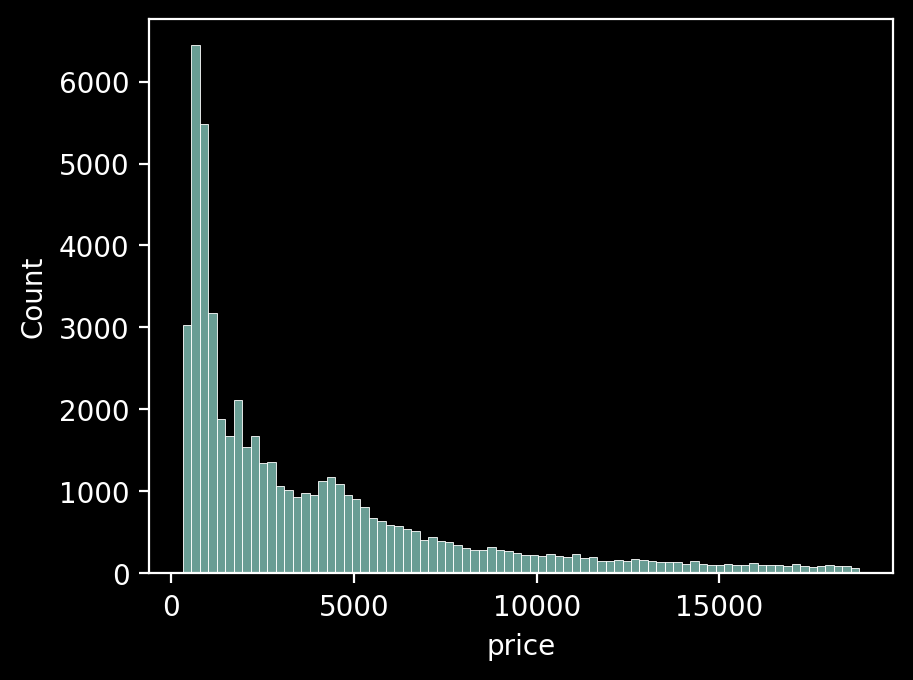

In [12]:
sns.histplot(data=df['price']);

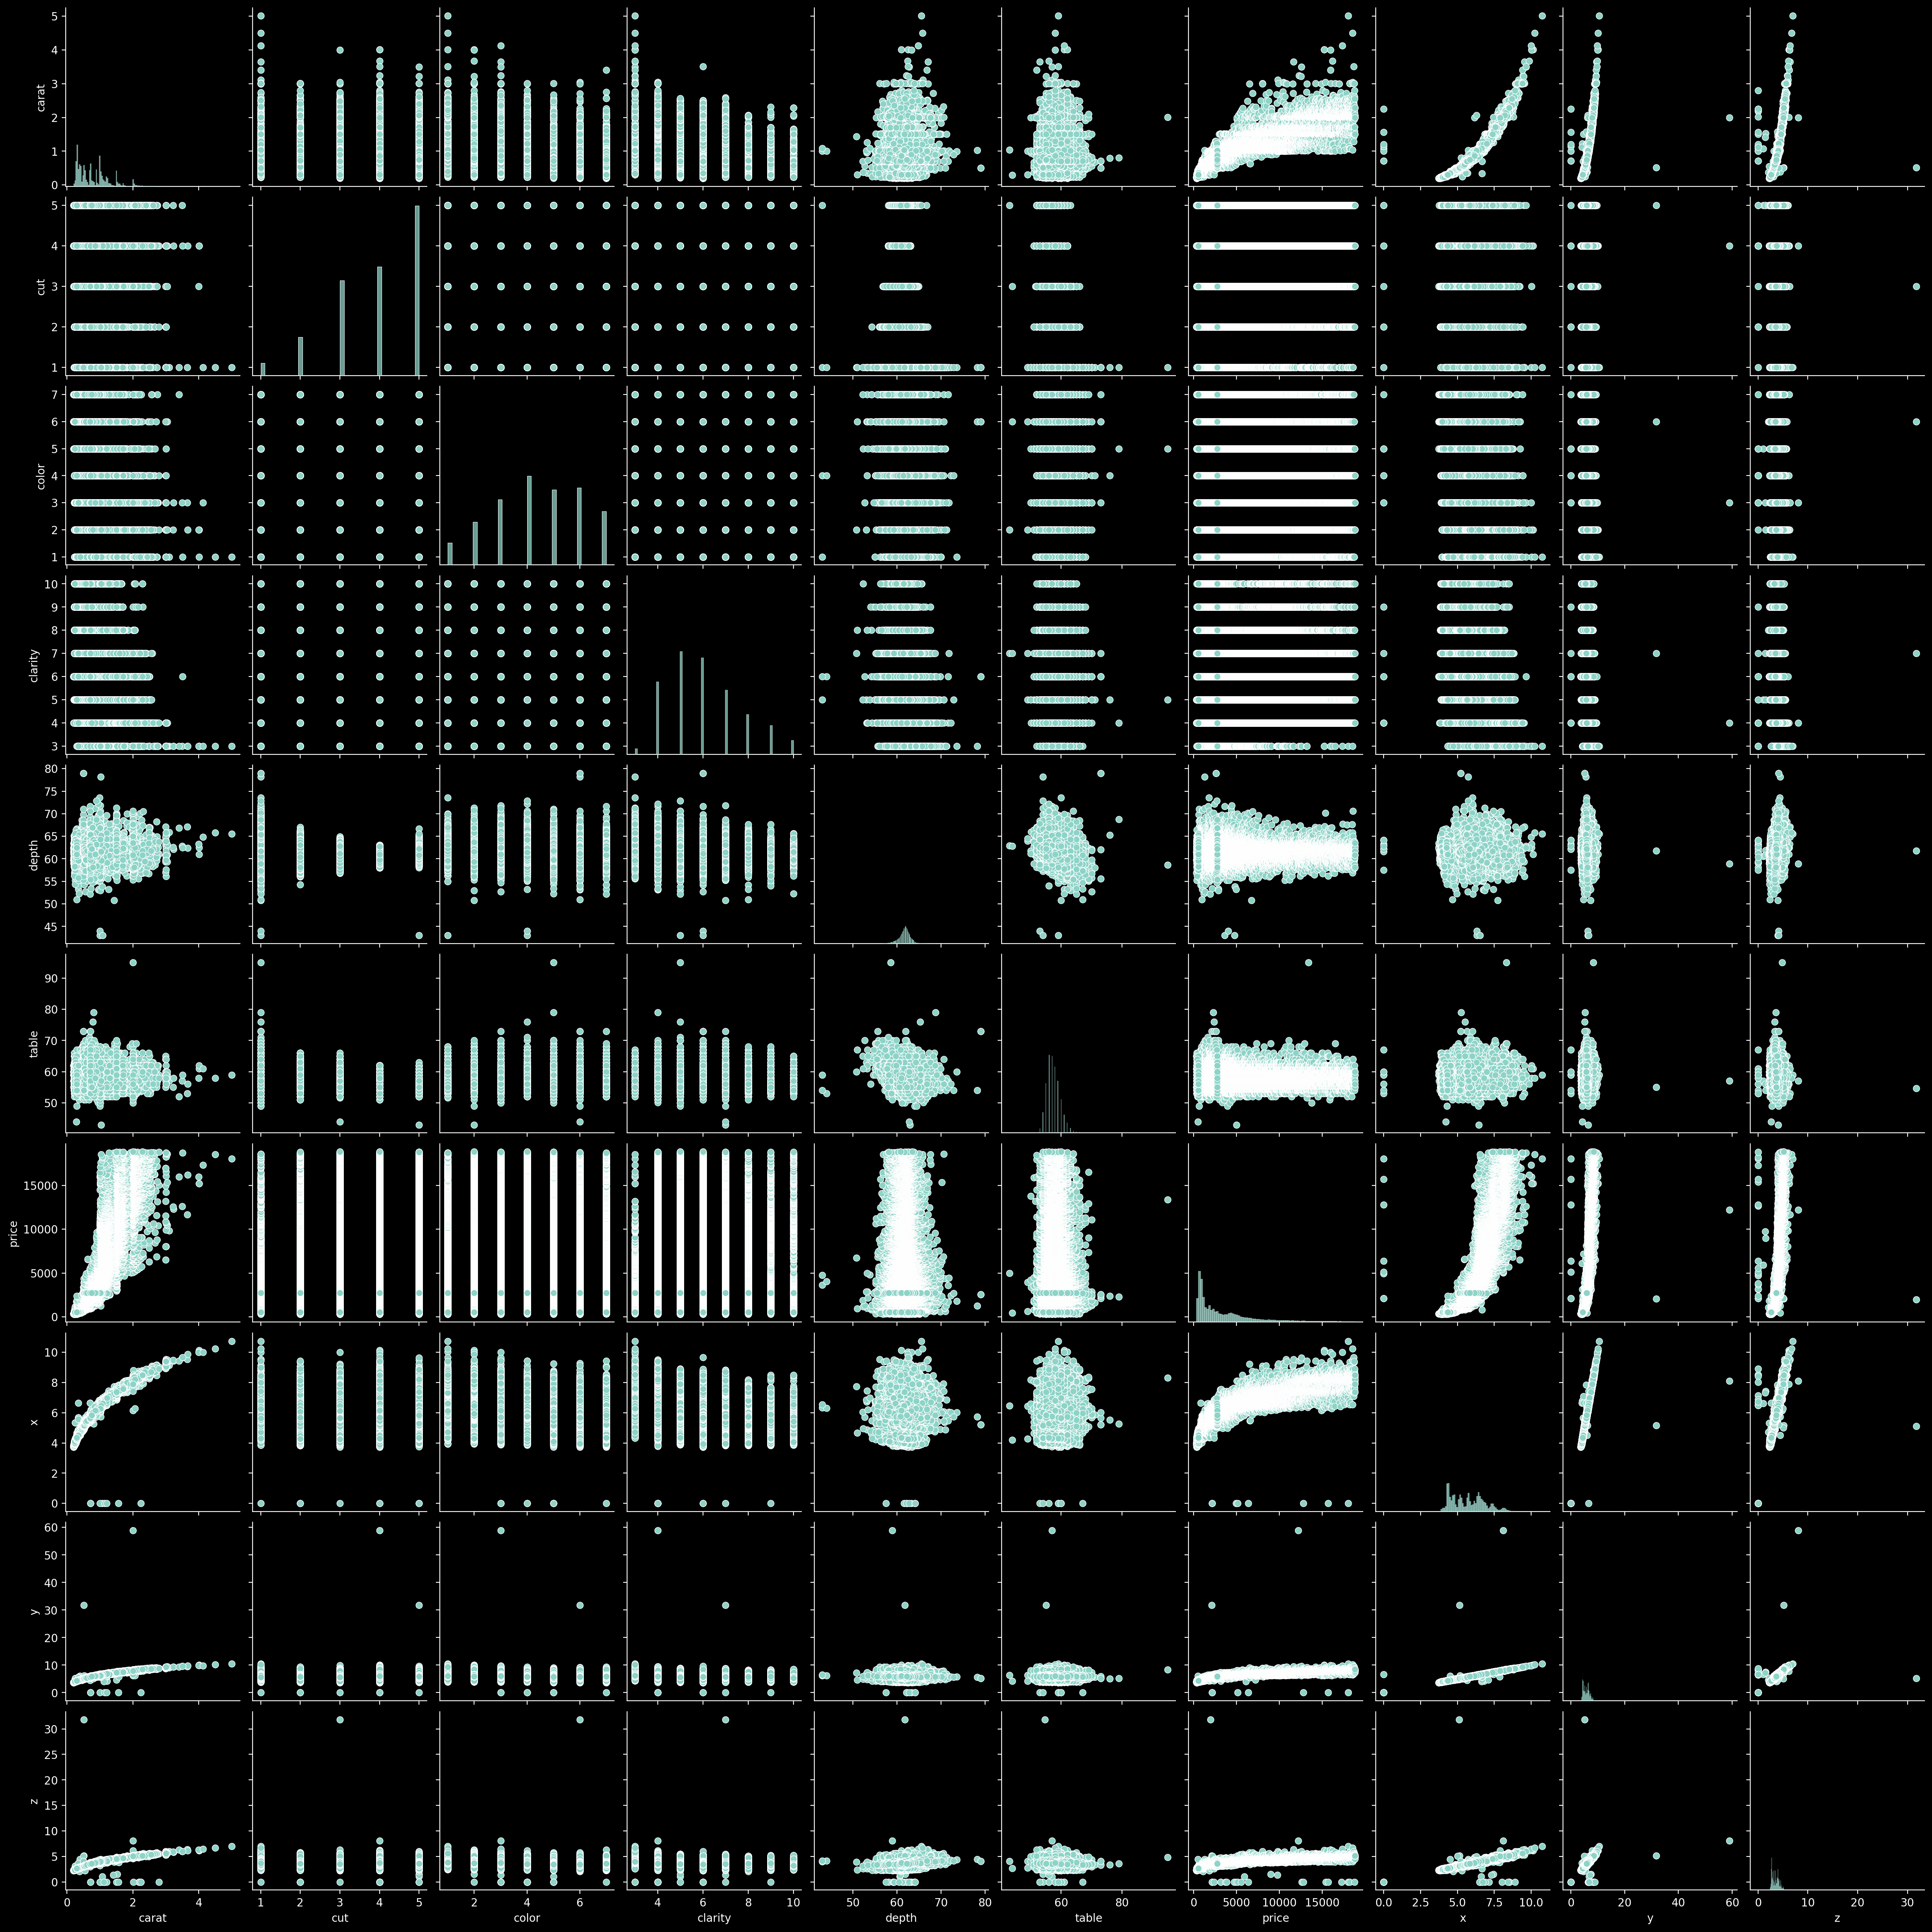

In [13]:
sns.pairplot(data=df);

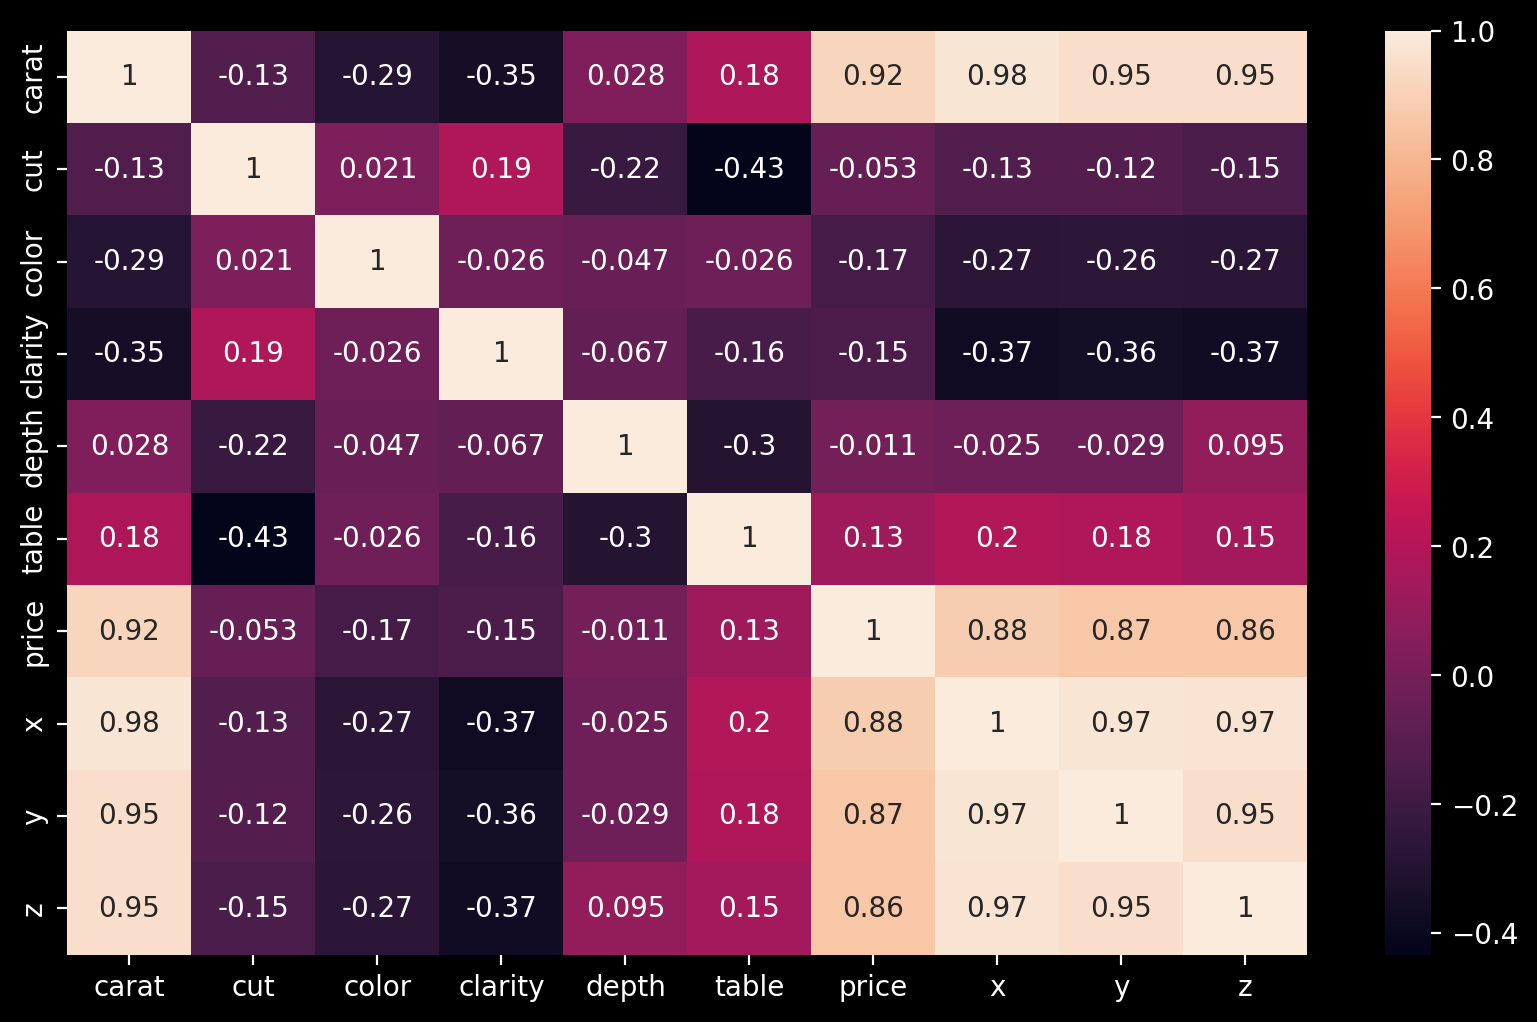

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True);

In [15]:
#The relationship between carat and price

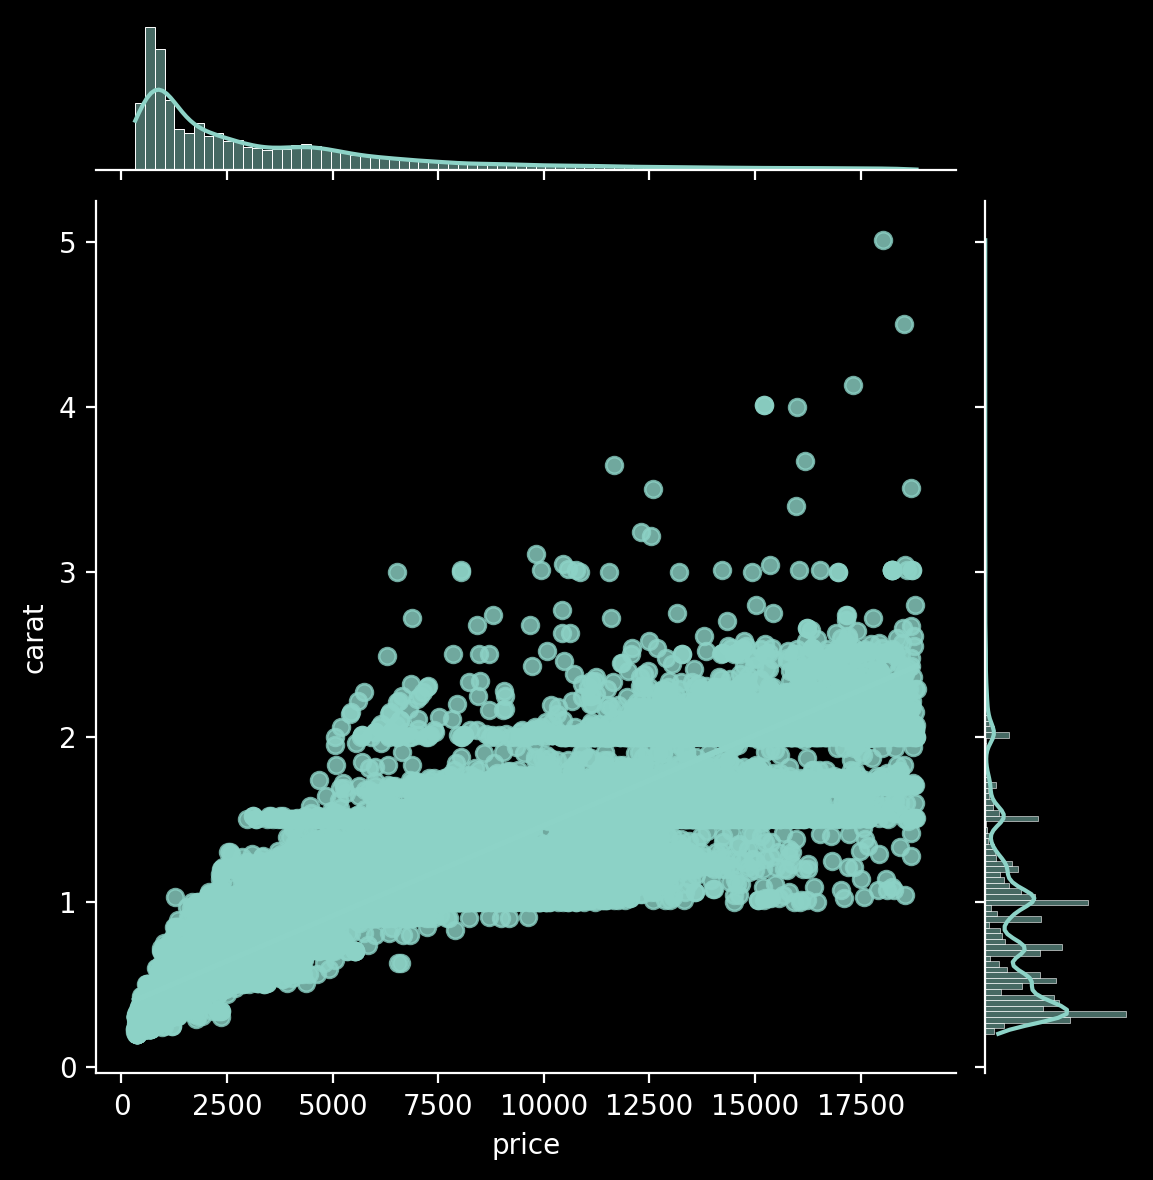

<Figure size 1000x600 with 0 Axes>

In [16]:
sns.jointplot(data=df,x='price',y='carat',kind='reg');
plt.figure(figsize=(10,6));

In [17]:
#The relationship between cut and price

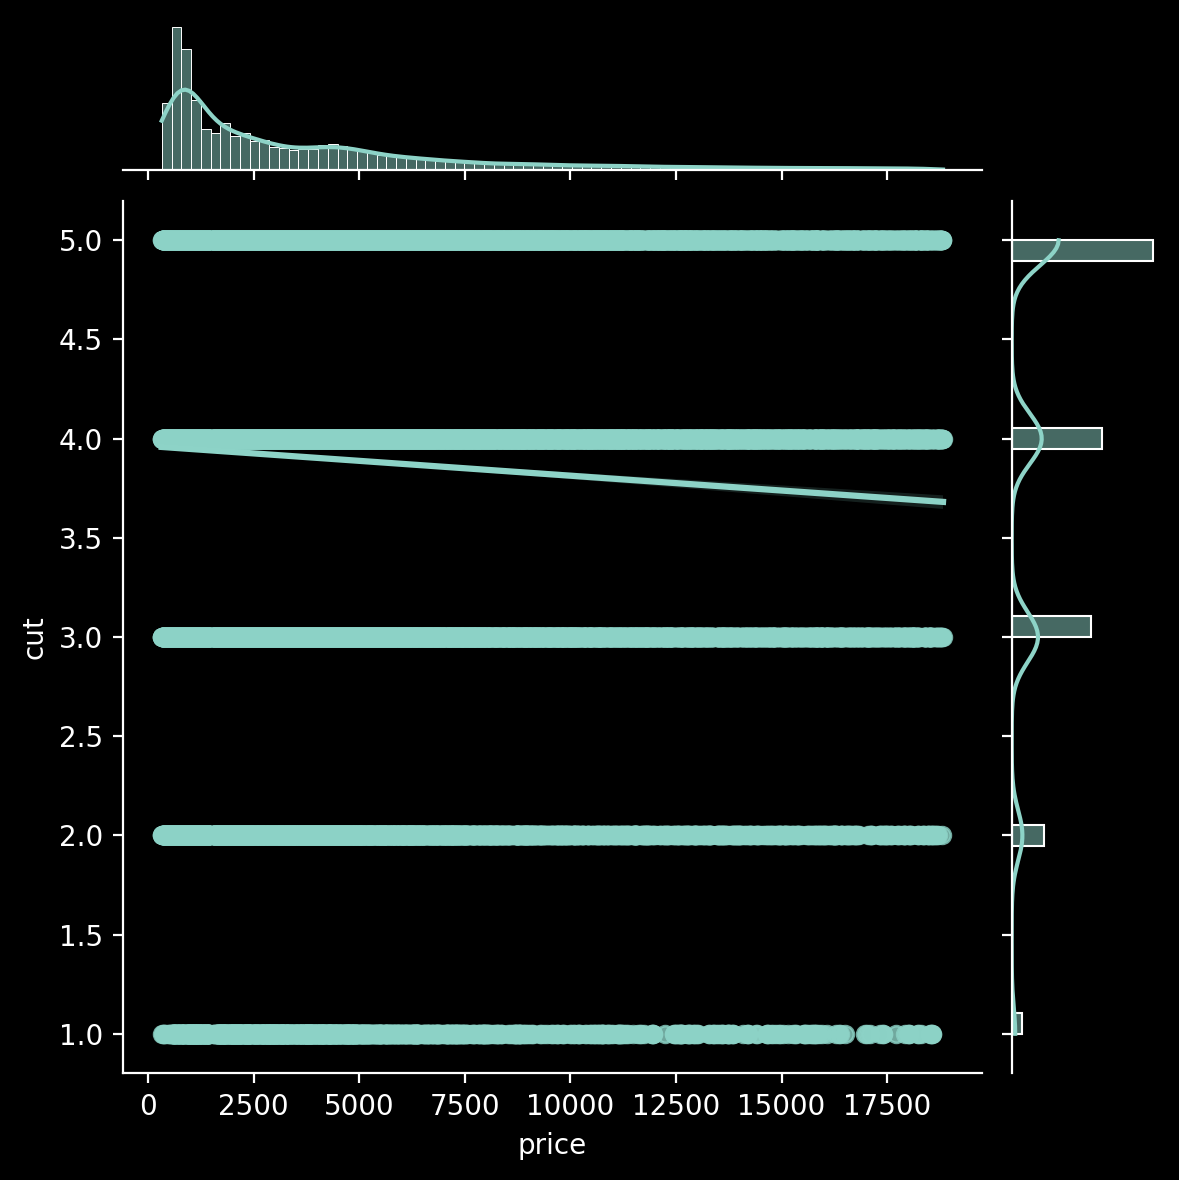

<Figure size 1000x600 with 0 Axes>

In [18]:
sns.jointplot(data=df,x='price',y='cut',kind='reg');
plt.figure(figsize=(10,6));

In [19]:
#The relationship between color and price

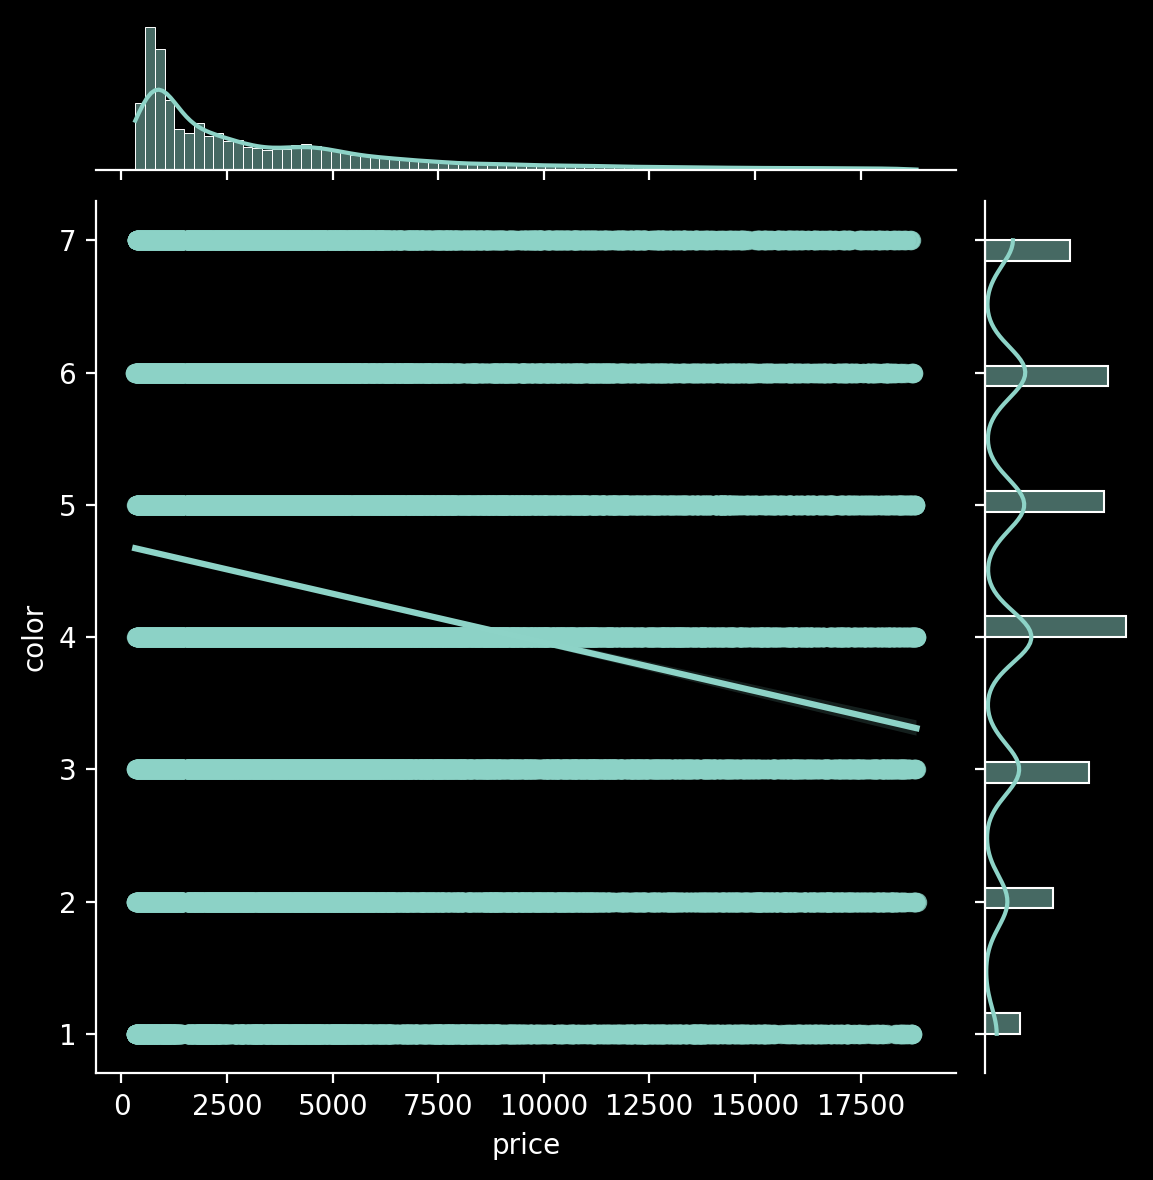

<Figure size 1000x600 with 0 Axes>

In [20]:
sns.jointplot(data=df,x='price',y='color',kind='reg');
plt.figure(figsize=(10,6));

In [21]:
#The relationship between clarity and price

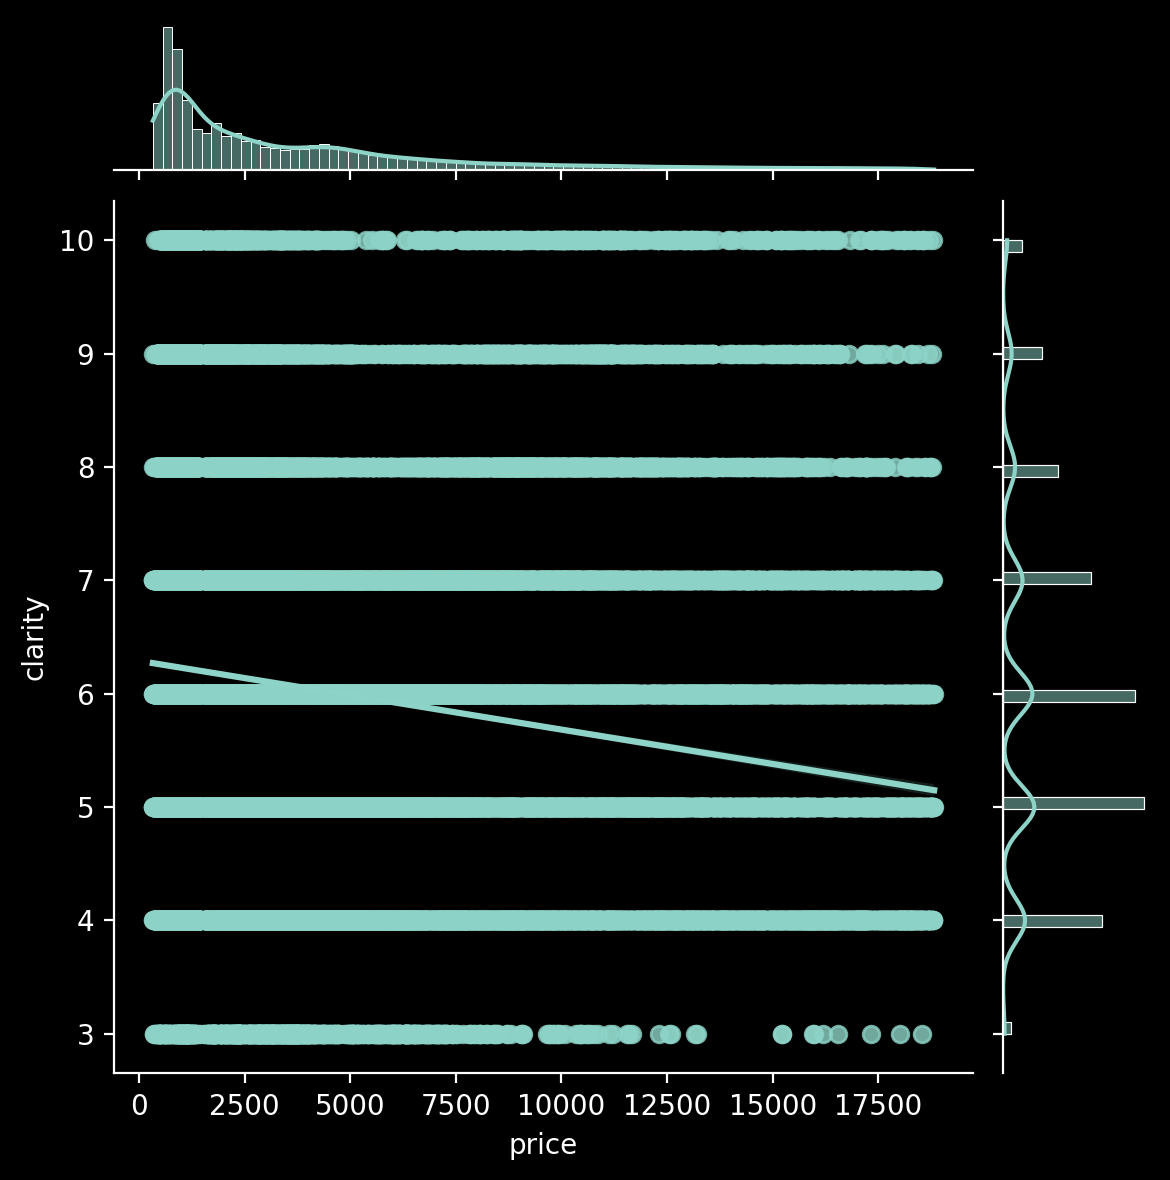

<Figure size 1000x600 with 0 Axes>

In [22]:
sns.jointplot(data=df,x='price',y='clarity',kind='reg');
plt.figure(figsize=(10,6));

In [23]:
#The relationship between clarity and price

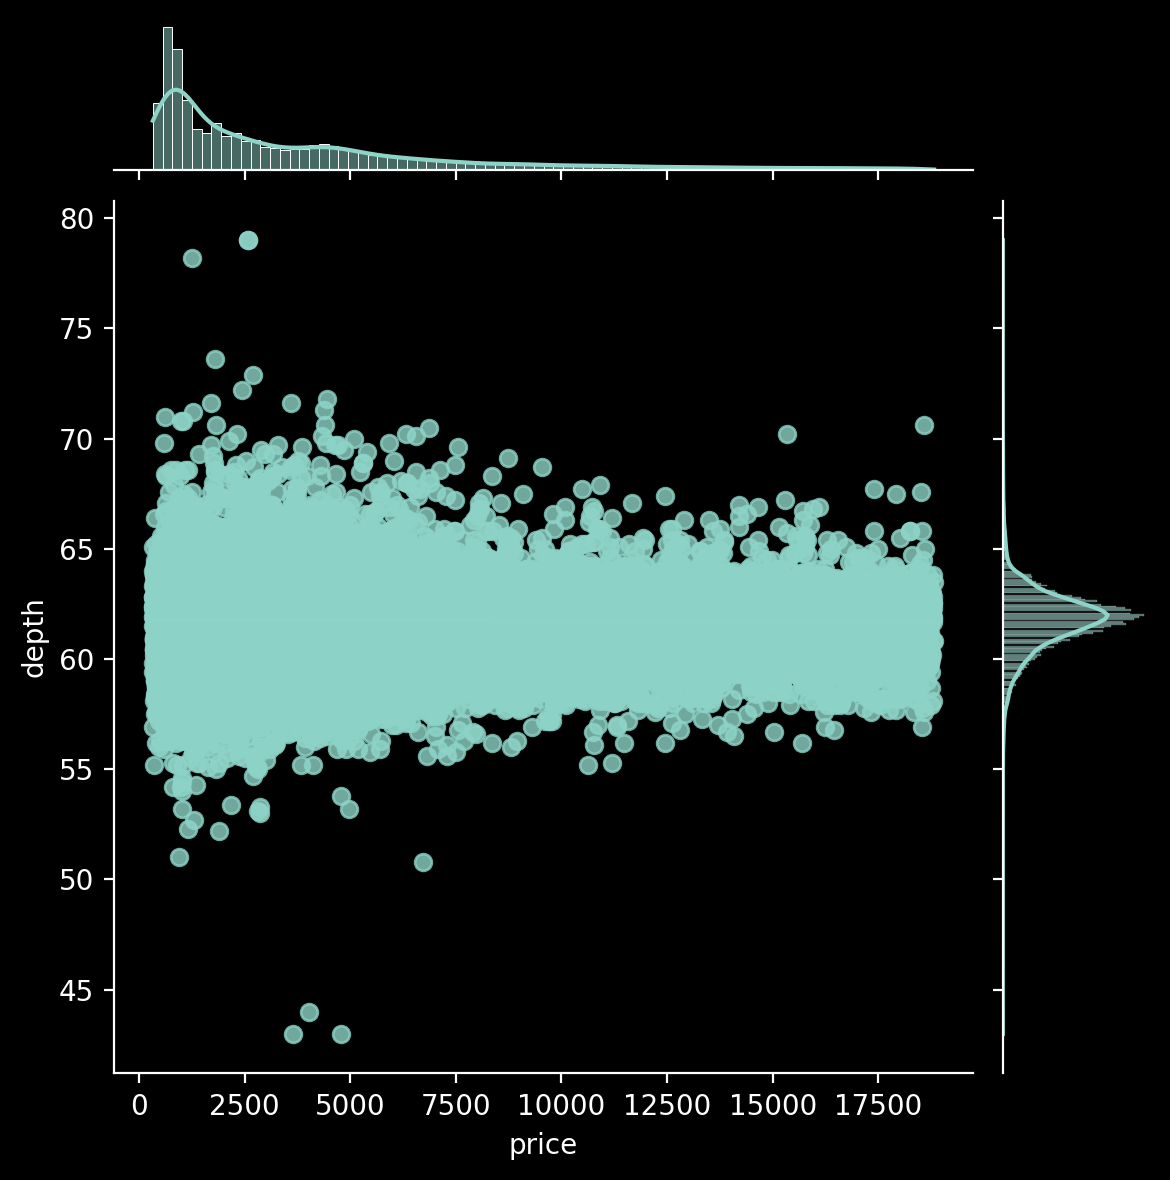

<Figure size 1000x600 with 0 Axes>

In [24]:
sns.jointplot(data=df,x='price',y='depth',kind='reg');
plt.figure(figsize=(10,6));

In [25]:
#The relationship between table and price

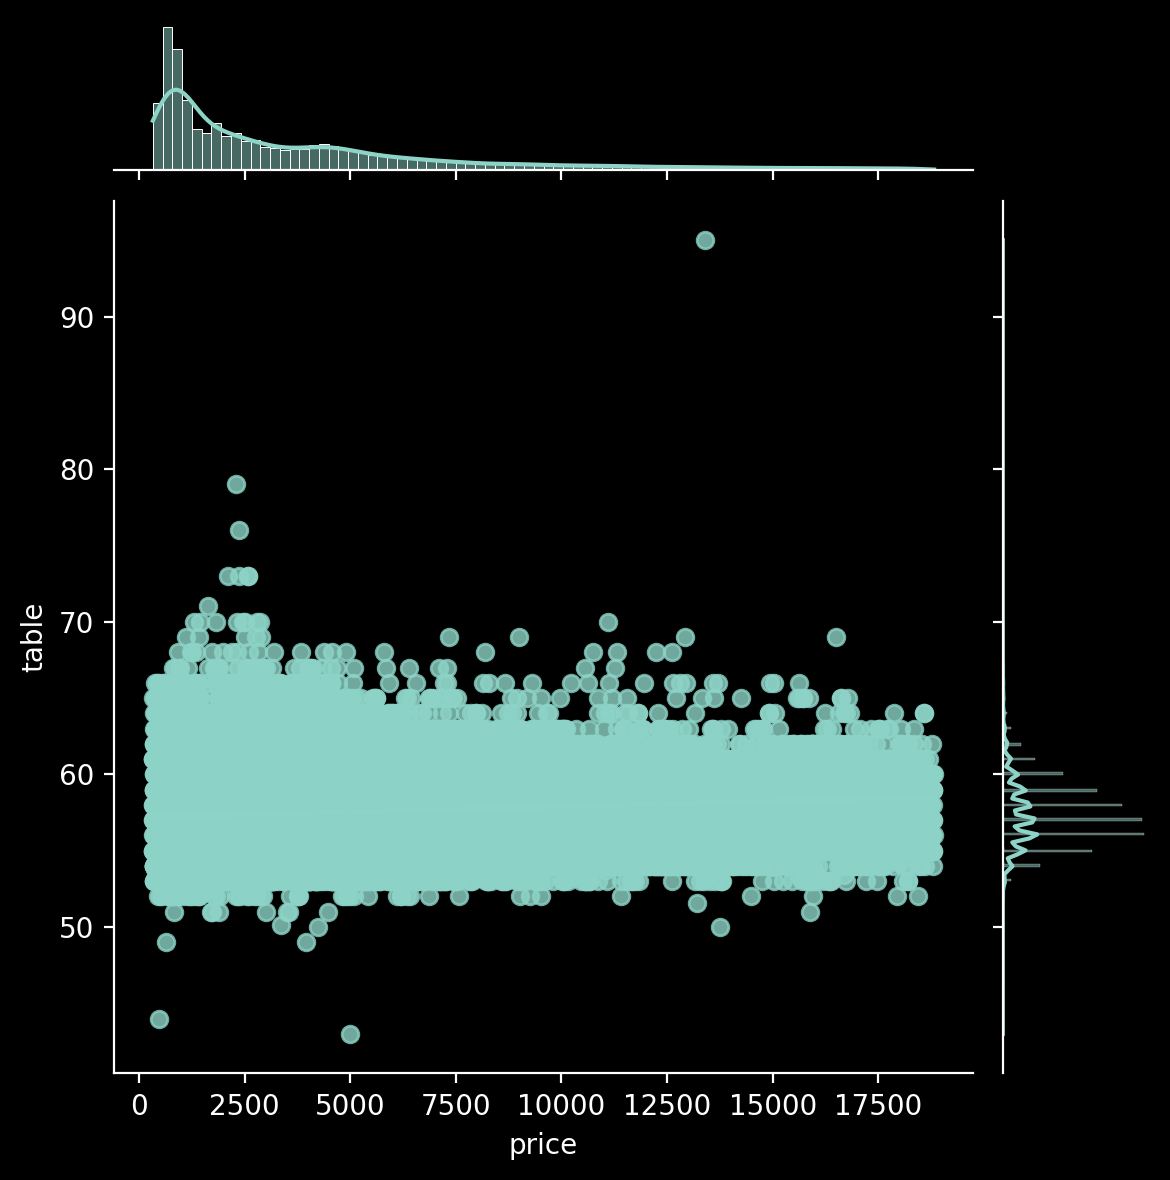

<Figure size 1000x600 with 0 Axes>

In [26]:
sns.jointplot(data=df,x='price',y='table',kind='reg');
plt.figure(figsize=(10,6));

In [27]:
#The relationship between x and price

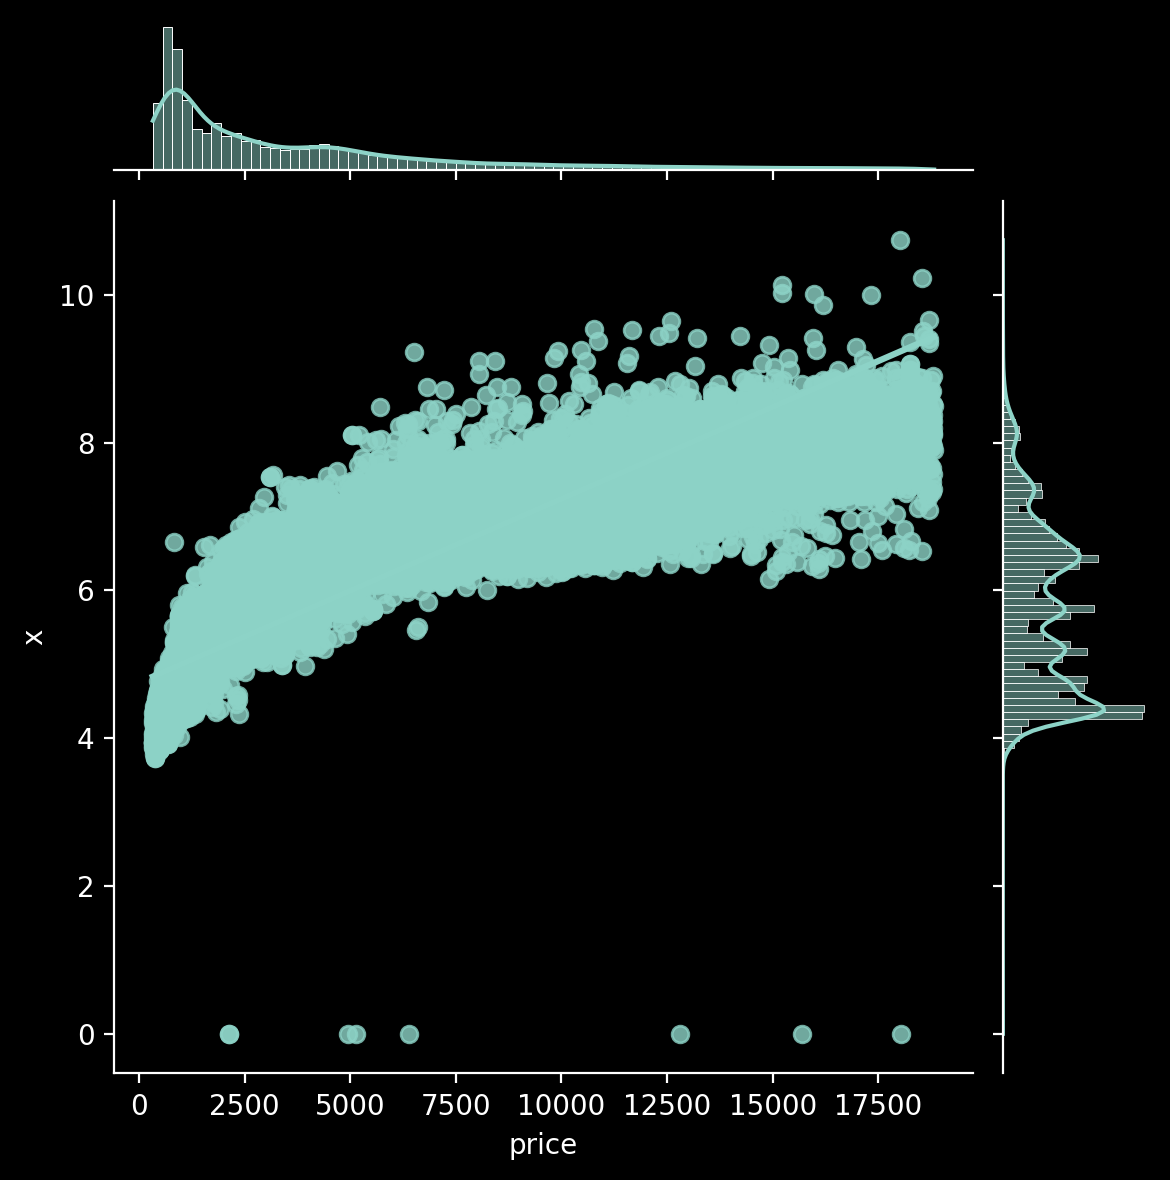

<Figure size 1000x600 with 0 Axes>

In [28]:
sns.jointplot(data=df,x='price',y='x',kind='reg');
plt.figure(figsize=(10,6));

In [29]:
#The relationship between y and price

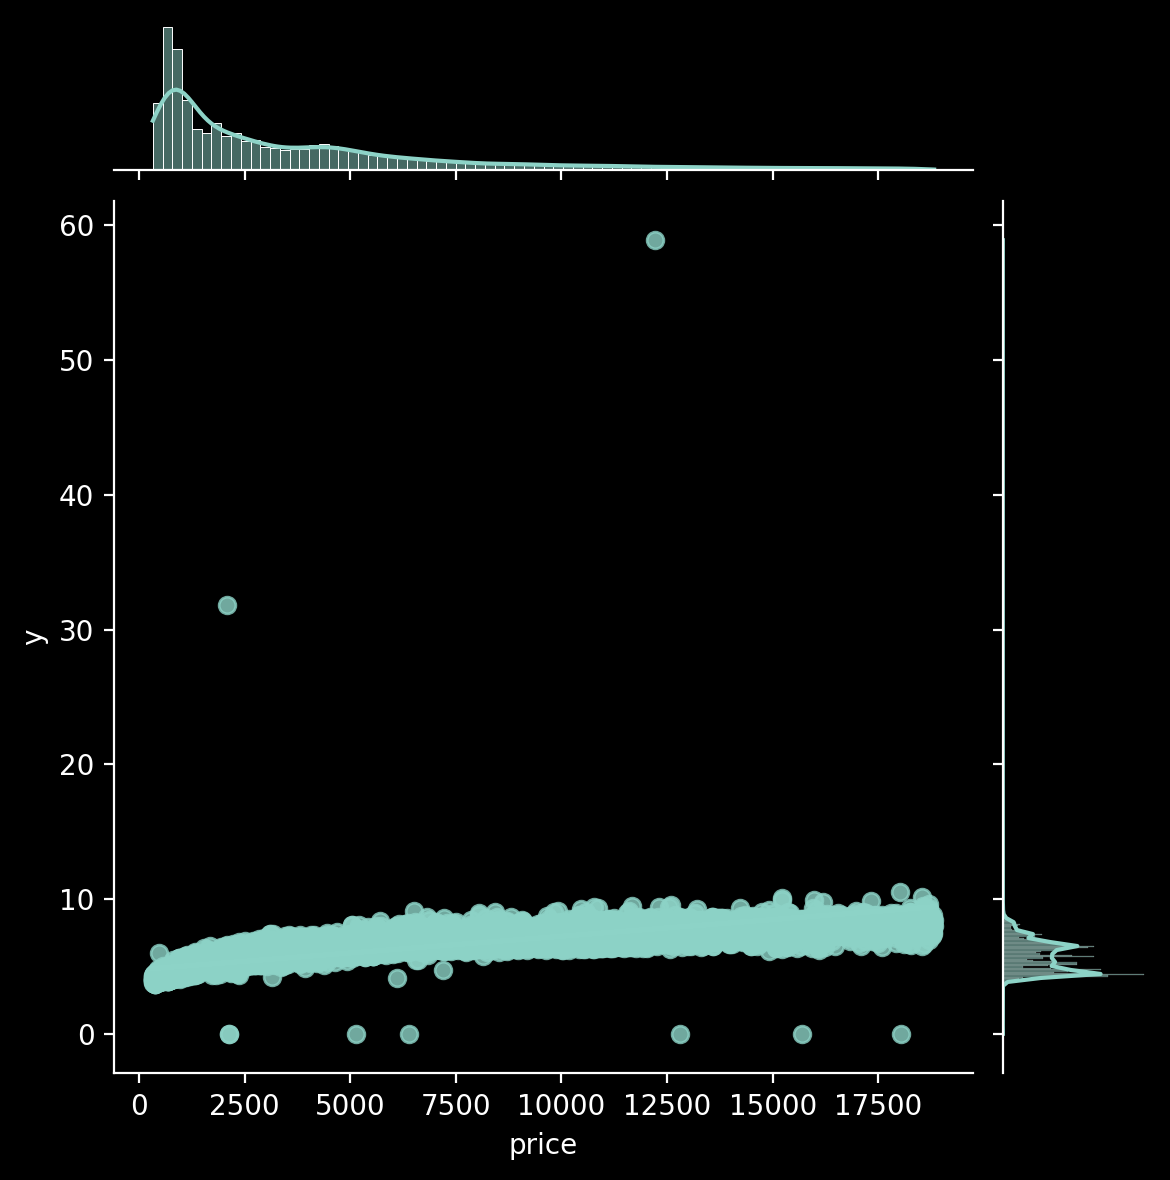

<Figure size 1000x600 with 0 Axes>

In [30]:
sns.jointplot(data=df,x='price',y='y',kind='reg');
plt.figure(figsize=(10,6));

In [31]:
#The relationship between z and price

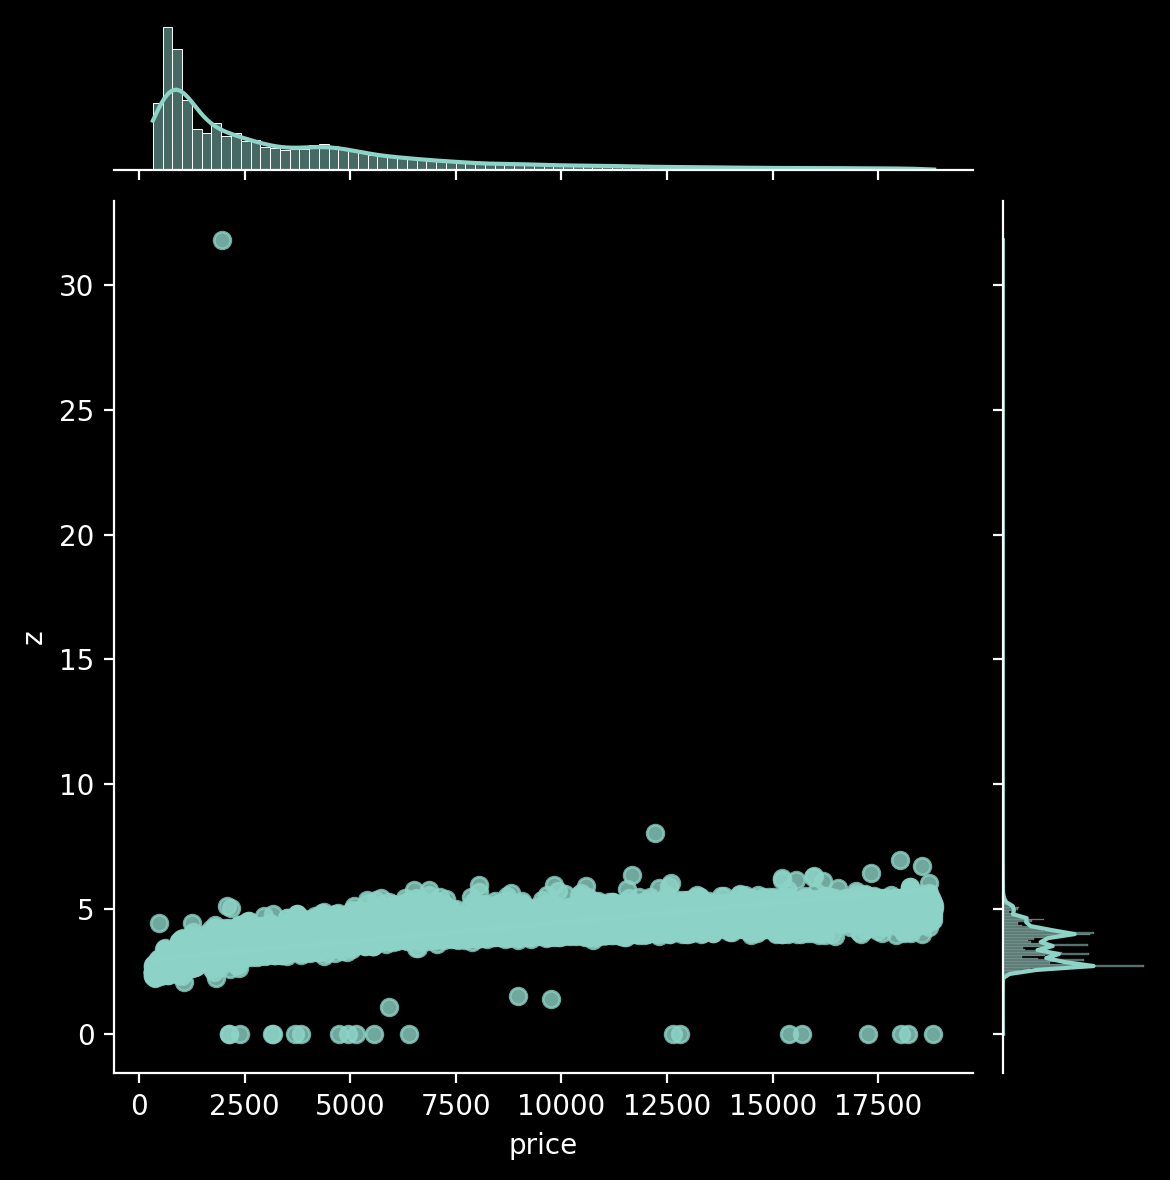

<Figure size 1000x600 with 0 Axes>

In [32]:
sns.jointplot(data=df,x='price',y='z',kind='reg');
plt.figure(figsize=(10,6));

In [33]:
#Training & Testing Split

In [34]:
x = df.drop('price',axis=1).values
x= preprocessing.scale(x)
y = df['price'].values

In [35]:
x

array([[-1.19816781,  0.98147332,  0.93716275, ..., -1.58783745,
        -1.53619556, -1.57112919],
       [-1.24036129,  0.08588908,  0.93716275, ..., -1.64132529,
        -1.65877419, -1.74117497],
       [-1.19816781, -1.70527938,  0.93716275, ..., -1.49869105,
        -1.45739502, -1.74117497],
       ...,
       [-0.20662095, -0.80969515,  1.52502147, ..., -0.06343409,
        -0.04774083,  0.03013526],
       [ 0.13092691,  0.08588908, -0.8264134 , ...,  0.37338325,
         0.33750627,  0.28520393],
       [-0.10113725,  0.98147332,  1.52502147, ...,  0.08811478,
         0.11861587,  0.14349912]])

In [36]:
y

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [38]:
x_train.shape

(43152, 9)

In [39]:
x_test.shape

(10788, 9)

In [40]:
y_train.shape

(43152,)

In [41]:
y_test.shape

(10788,)

In [51]:
lm = svm.SVR(kernel='linear')
lm.fit(x_train,y_train)

SVR(kernel='linear')

In [52]:
lm.score(x_test,y_test)

0.8613030336560709

In [53]:
prediction = lm.predict(x_test)
prediction

array([ 8529.39046233,  1949.10684565, 15162.80048951, ...,
        2344.74287629,  8496.52167792,   655.74526827])

In [54]:
prediction = pd.DataFrame(prediction,columns=['prediction'])
prediction

prediction
0       8529.390462
1       1949.106846
2      15162.800490
3       1832.066000
4       3211.306803
...             ...
10783   3630.939761
10784   4259.963969
10785   2344.742876
10786   8496.521678
10787    655.745268

[10788 rows x 1 columns]

In [57]:
prediction['Actual'] = y_test
prediction

prediction  Actual
0       8529.390462    9979
1       1949.106846    1625
2      15162.800490   15148
3       1832.066000    2290
4       3211.306803    2482
...             ...     ...
10783   3630.939761    3198
10784   4259.963969    4021
10785   2344.742876    2111
10786   8496.521678    9234
10787    655.745268     984

[10788 rows x 2 columns]

In [58]:
#kernel=rbf

In [59]:
lm2 = svm.SVR(kernel='rbf')
lm2.fit(x_train,y_train)

SVR()

In [60]:
lm2.score(x_test,y_test)

0.5331090548958266

In [88]:
prediction2 = lm2.predict(x_test)
prediction2

array([6187.34005179, 2361.88550084, 5084.57933825, ..., 1831.22266614,
       5716.78978154,  802.77724322])

In [89]:
prediction2 = pd.DataFrame(prediction2,columns=['prediction'])
prediction2

prediction
0      6187.340052
1      2361.885501
2      5084.579338
3      1562.362493
4      3155.720457
...            ...
10783  3637.755693
10784  3743.972715
10785  1831.222666
10786  5716.789782
10787   802.777243

[10788 rows x 1 columns]

In [90]:
prediction2['Actual'] = y_test
prediction2

prediction  Actual
0      6187.340052    9979
1      2361.885501    1625
2      5084.579338   15148
3      1562.362493    2290
4      3155.720457    2482
...            ...     ...
10783  3637.755693    3198
10784  3743.972715    4021
10785  1831.222666    2111
10786  5716.789782    9234
10787   802.777243     984

[10788 rows x 2 columns]

In [91]:
#kernel='linear' Analysis

In [67]:
lm.coef_

array([[ 3.28070672e+03,  8.01441995e+01,  2.51234348e+02,
         4.42781230e+02, -1.70810454e+01, -1.30807941e+01,
         6.73571542e+01,  5.77252418e+01,  2.64860832e-01]])

In [68]:
lm.intercept_

array([3577.43023374])

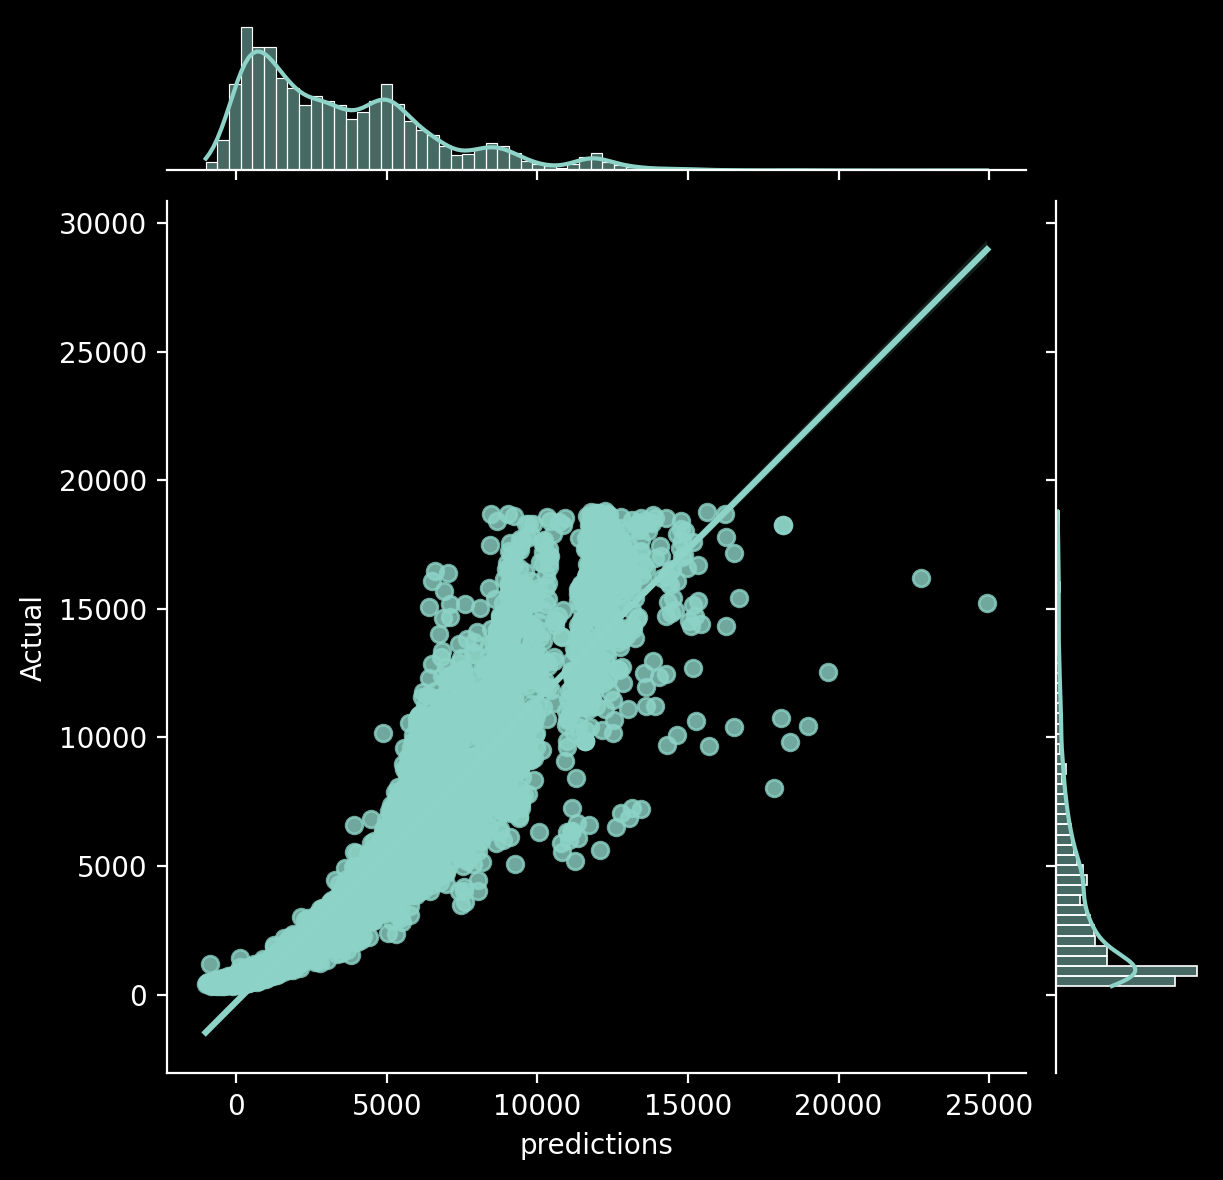

In [71]:
sns.jointplot(data=prediction,x='prediction',y='Actual',kind='reg');
plt.xlabel('predictions');

<ipython-input-73-434b046c178f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction['prediction']));


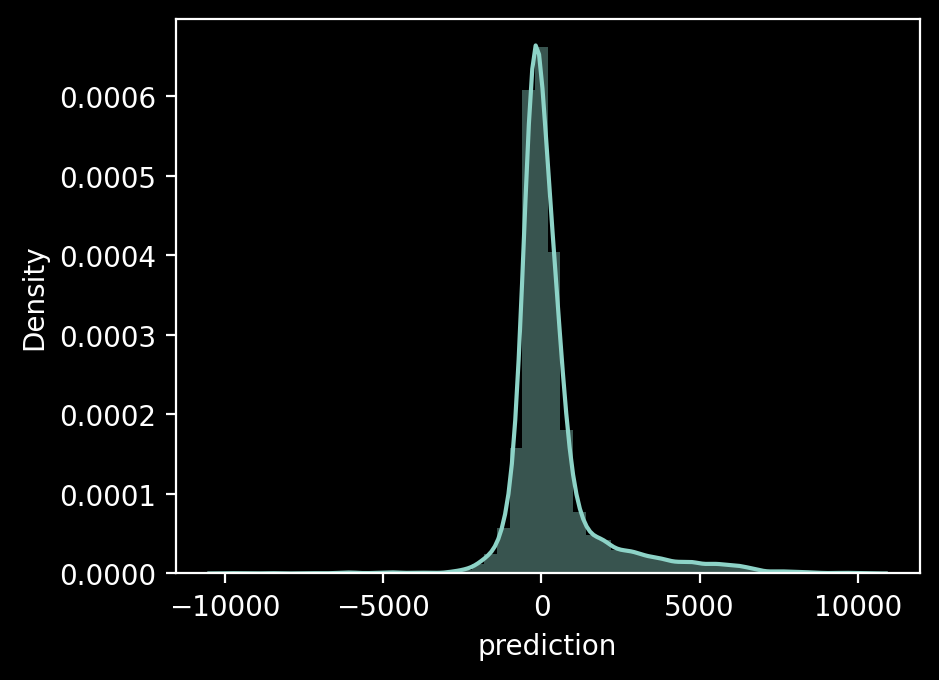

In [73]:
sns.distplot((y_test-prediction['prediction']));

In [76]:
metrics.mean_absolute_error(y_test,prediction['prediction'])#MAE

809.3228157664579

In [77]:
metrics.mean_squared_error(y_test,prediction['prediction'])#MSE

2177543.1794054764

In [80]:
np.sqrt(metrics.mean_squared_error(y_test,prediction['prediction']))#RMSE

1475.6500870482394

In [81]:
metrics.r2_score(y_test,prediction['prediction'])#R^2

0.8613030336560709

In [92]:
#kernel='rbf' Analysis

In [93]:
lm2.intercept_

array([3242.53449714])

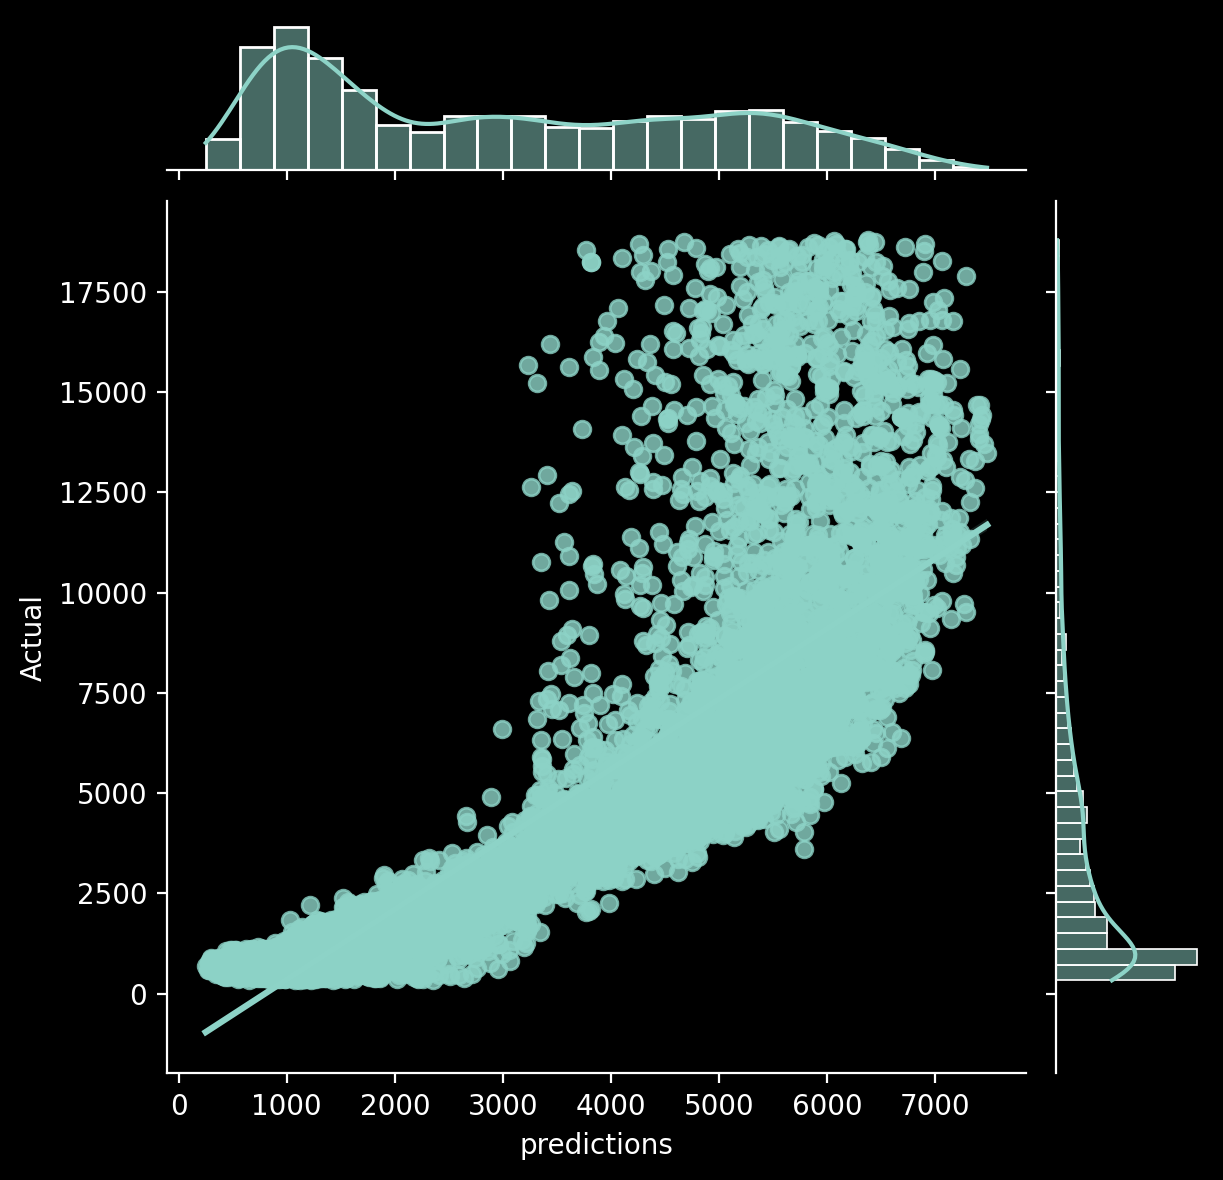

In [94]:
sns.jointplot(data=prediction2,x='prediction',y='Actual',kind='reg');
plt.xlabel('predictions');

<ipython-input-95-7f0521af1408>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction2['prediction']));


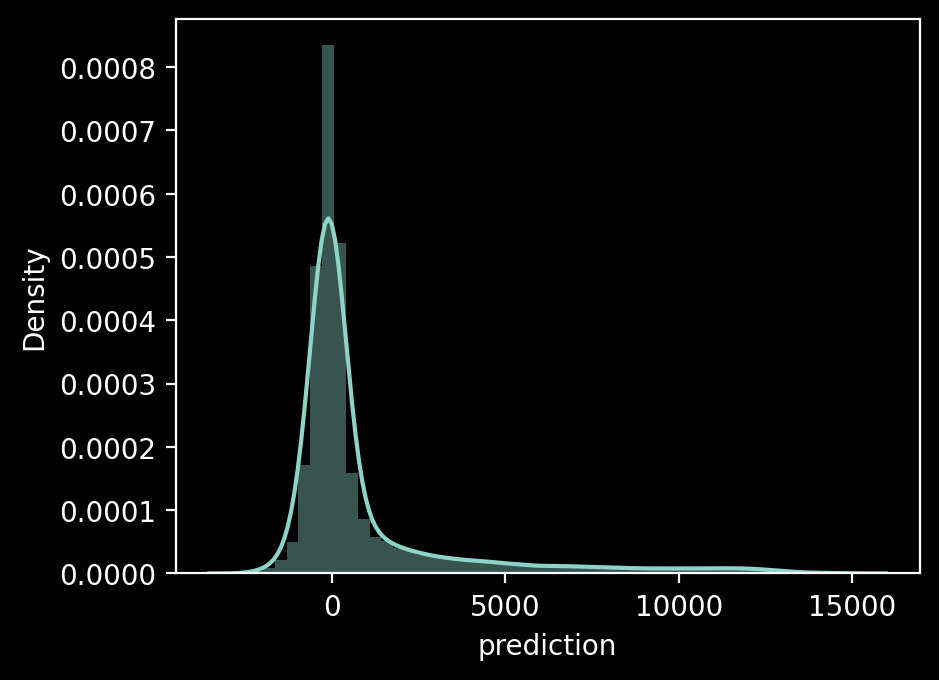

In [95]:
sns.distplot((y_test-prediction2['prediction']));

In [96]:
metrics.mean_absolute_error(y_test,prediction2['prediction'])#MAE

1258.4067223233178

In [97]:
metrics.mean_squared_error(y_test,prediction2['prediction'])#MSE

7330190.557425054

In [98]:
np.sqrt(metrics.mean_squared_error(y_test,prediction2['prediction']))#RMSE

2707.4324659028994

In [99]:
metrics.r2_score(y_test,prediction2['prediction'])#R^2

0.5331090548958266